<a href="https://colab.research.google.com/github/SairamS28/SairamS28/blob/main/Netflix_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scaler Case Study Neflix

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data imporing

In [ ]:
Netflix = pd.read_csv("https://gist.github.com/singhsidhukuldeep/564f271315abb6bc22647e81e6bf4762/raw/66fb67a8bb014df6b7f924aad0a91aa662bc7fc2/netflix_titles.csv")
print(Netflix.shape)

Netflix["director"].value_counts()

(8807, 12)


Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

Replacing Cast with unknown if null

In [ ]:
Netflix.loc[Netflix["cast"].isna(),"cast"]="Unknown"
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,Unknown,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Splitting cast into multiple elements

In [ ]:
New_cast = Netflix[["title", "cast"]]
Netflix["cast"] = New_cast["cast"].apply(lambda x: str(x).split(","))
Netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[Unknown],United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,[Unknown],NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downe...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,[Unknown],NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
Netflix["listed_in"] =Netflix["listed_in"].apply(lambda x: str(x).split(","))
Netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[Unknown],United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,[Unknown],NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downe...",United States,"November 20, 2019",2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,[Unknown],NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",United States,"November 1, 2019",2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",United States,"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


Replacing Cast with Unknown if null

In [ ]:
Netflix.loc[Netflix["country"].isna(),"country"]="Unknown"
Netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[Unknown],United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,[Unknown],Unknown,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downe...",United States,"November 20, 2019",2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,[Unknown],Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",United States,"November 1, 2019",2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",United States,"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


Movie      6131
TV Show    2676
Name: type, dtype: int64


<Axes: xlabel='type', ylabel='count'>

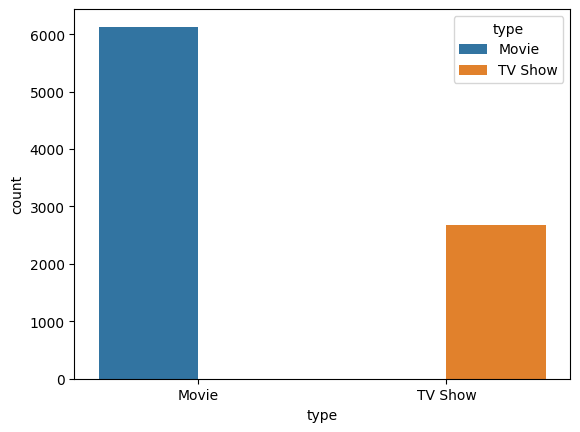

In [ ]:
print(Netflix["type"].value_counts())
sns.countplot(x="type",hue="type",data=Netflix)

TV shows and Movies

In [ ]:
Grouped_Netflix=Netflix.groupby("type")
TV_shows=Grouped_Netflix.get_group("TV Show").sort_values("date_added")
Movies=Grouped_Netflix.get_group("Movie").sort_values("date_added")


Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
                          ..
Robert Clouse              1
Kevin Hooks                1
Christian Alvart           1
Kim Dong-kyu               1
Marcus Clarke              1
Name: director, Length: 4354, dtype: int64

In [ ]:
TV_shows["date_added"]=pd.to_datetime(TV_shows["date_added"])
TV_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8423,s8424,TV Show,The Minimighty Kids,NaN,[Unknown],France,2018-04-15,2012,TV-G,2 Seasons,"[Kids' TV, TV Comedies]","Some have big feet or a sniffly nose, others a..."
7521,s7522,TV Show,Mr. Young,NaN,"[Brendan Meyer, Matreya Fedor, Gig Morton, ...",Canada,2019-04-16,2013,TV-G,2 Seasons,"[Kids' TV, TV Comedies]","After Adam graduates from college at age 14, h..."
7342,s7343,TV Show,Lost Girl,NaN,"[Anna Silk, Kris Holden-Ried, Ksenia Solo, ...",Canada,2016-04-17,2015,TV-14,5 Seasons,"[TV Dramas, TV Horror, TV Mysteries]",Discovering she's a succubus who sustains hers...
8257,s8258,TV Show,The Cravings,NaN,"[Park Hee-bon, Phillip Choi, Hong Wan-pyo, ...",South Korea,2017-04-20,2016,TV-14,2 Seasons,"[International TV Shows, Korean TV Shows, TV...",Thirtysomething career woman Jae-yeong attempt...
6460,s6461,TV Show,Chewing Gum,NaN,"[Michaela Coel, John Macmillan, Robert Lonsd...",United Kingdom,2017-04-04,2017,TV-MA,2 Seasons,"[British TV Shows, International TV Shows, R...","The virginal Tracey, who was raised in a stric..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7196,s7197,TV Show,Kikoriki,NaN,[Igor Dmitriev],Unknown,NaT,2010,TV-Y,2 Seasons,[Kids' TV],A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"[Eugenio Derbez, Consuelo Duval, Luis Manuel...",United States,NaT,2012,TV-14,3 Seasons,"[International TV Shows, Spanish-Language TV ...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"[Marc Maron, Judd Hirsch, Josh Brener, Nora...",United States,NaT,2016,TV-MA,4 Seasons,[TV Comedies],"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"[Burnie Burns, Jason Saldaña, Gustavo Sorola...",United States,NaT,2015,NR,13 Seasons,"[TV Action & Adventure, TV Comedies, TV Sci-...","This parody of first-person shooter games, mil..."


In [ ]:
Movies["date_added"]=pd.to_datetime(Movies["date_added"])
Movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7107,s7108,Movie,Iverson,Zatella Beatty,[Allen Iverson],United States,2016-04-01,2014,NR,88 min,"[Documentaries, Sports Movies]",This unfiltered documentary follows the rocky ...
7124,s7125,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,[Jeremy Scott],United States,2016-04-01,2015,PG-13,109 min,[Documentaries],The journey of fashion designer Jeremy Scott f...
5854,s5855,Movie,Frank and Cindy,G.J. Echternkamp,[Unknown],United States,2016-04-01,2007,TV-MA,70 min,"[Documentaries, Music & Musicals]",Frank was a rising pop star when he married Ci...
6363,s6364,Movie,Born to Be Free,Gayane Petrosyan,[Casting a light on the mistreatment of sea ma...,"United Kingdom, Russia",2017-04-01,2016,TV-14,74 min,"[Documentaries, International Movies]",Casting a light on the mistreatment of sea mam...
8202,s8203,Movie,The Bad Kids,"Keith Fulton, Louis Pepe",[Unknown],United States,2017-04-01,2016,TV-MA,101 min,[Documentaries],"In this documentary, teachers at a Mojave Dese..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2034,s2035,Movie,So Much Love to Give,Marcos Carnevale,"[Adrián Suar, Soledad Villamil, Gabriela Tos...",Argentina,2020-09-09,2020,TV-14,108 min,"[Comedies, International Movies, Music & Mus...",Fernando is a family man — equally committed t...
2035,s2036,Movie,The Social Dilemma,Jeff Orlowski,"[Skyler Gisondo, Kara Hayward, Vincent Karth...",United States,2020-09-09,2020,PG-13,94 min,[Documentaries],This documentary-drama hybrid explores the dan...
90,s91,Movie,Paradise Hills,Alice Waddington,"[Emma Roberts, Danielle Macdonald, Awkwafina...","Spain, United States",2021-09-09,2019,TV-MA,95 min,"[Sci-Fi & Fantasy, Thrillers]",Uma wakes up in a lush tropical facility desig...
91,s92,Movie,The Women and the Murderer,"Mona Achache, Patricia Tourancheau",[Unknown],France,2021-09-09,2021,TV-14,92 min,"[Documentaries, International Movies]",This documentary traces the capture of serial ...


In [ ]:
Recent_Movies=Movies["date_added"].dt.year.value_counts()
Recent_Movies.sort_index()

2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     253
2017     839
2018    1237
2019    1424
2020    1284
2021     993
Name: date_added, dtype: int64

[Text(0.5, 1.0, 'Movies by year'),
 Text(0.5, 0, 'Years'),
 Text(0, 0.5, 'Movies Count')]

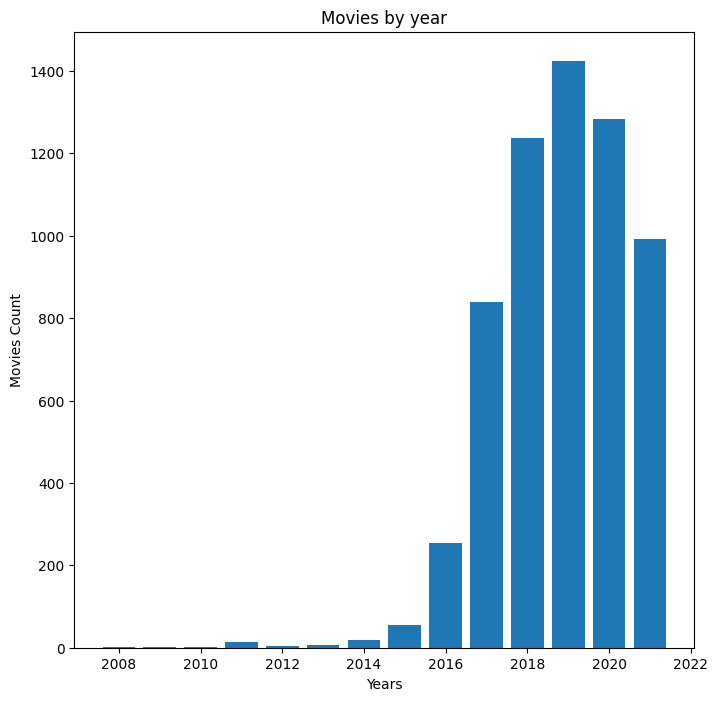

In [ ]:
fig, ax = plt.subplots(figsize=(8,8)) # width & height

x=Movies["date_added"].dt.year.value_counts().index
y=Movies["date_added"].dt.year.value_counts().values

ax.bar(x,y)
ax.set(title="Movies by year",
        xlabel="Years",
        ylabel="Movies Count")

In [ ]:
Recent_shows=TV_shows["date_added"].dt.year.value_counts()
Recent_shows.sort_index()

2008.0      1
2013.0      5
2014.0      5
2015.0     26
2016.0    176
2017.0    349
2018.0    412
2019.0    592
2020.0    595
2021.0    505
Name: date_added, dtype: int64

[Text(0.5, 1.0, 'TV_shows by year'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Years')]

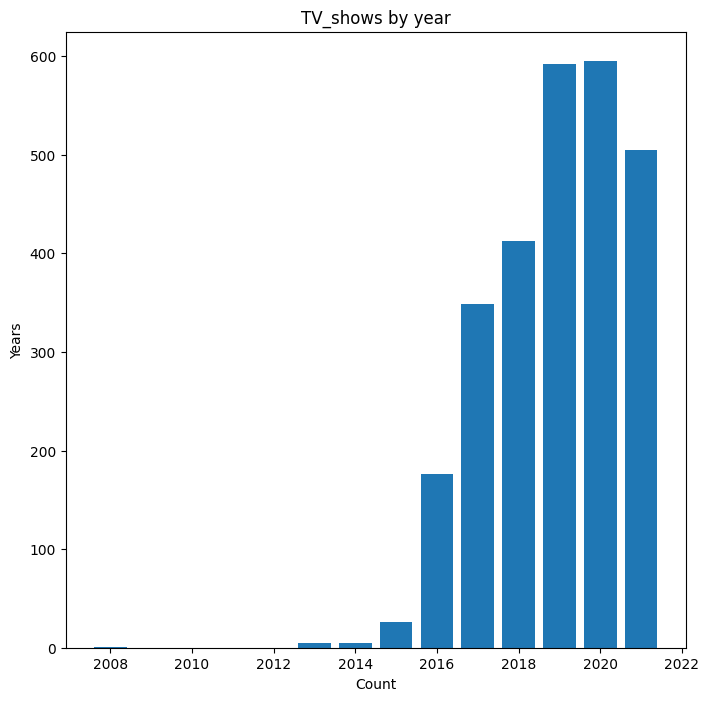

In [ ]:
fig, ax = plt.subplots(figsize=(8,8)) # width & height

x=TV_shows["date_added"].dt.year.value_counts().index
y=TV_shows["date_added"].dt.year.value_counts().values


ax.bar(x,y)

ax.set(title="TV_shows by year",
        xlabel="Count",
        ylabel="Years")

<Axes: xlabel='count', ylabel='listed_in'>

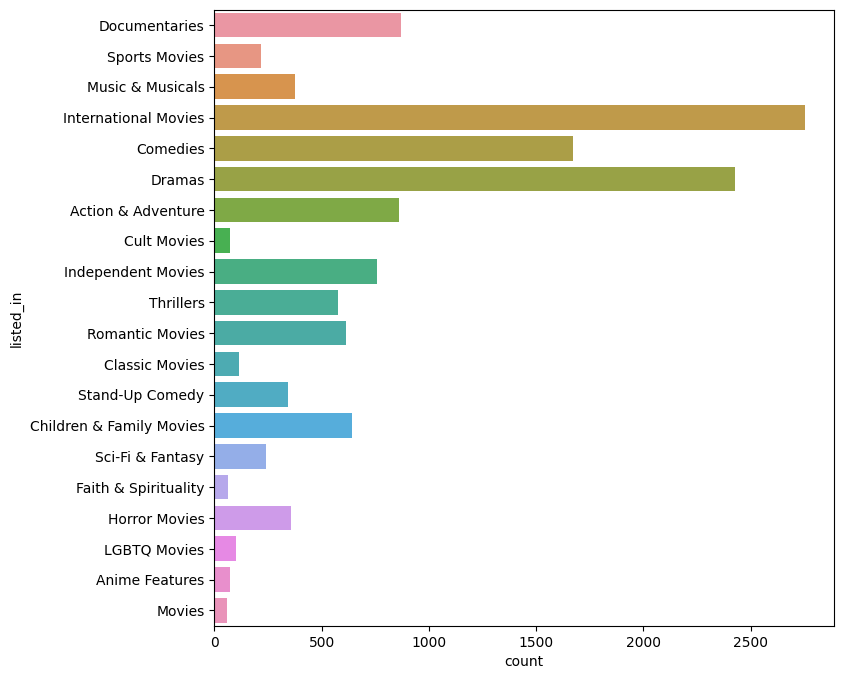

In [ ]:
NewMovies=Movies.explode("listed_in")
NewMovies=NewMovies.reset_index().drop("index",axis=1)
NewMovies["listed_in"]=NewMovies["listed_in"].apply(lambda x:str(x).strip())#The Spaces in the catergories cause redundance in the graph
NewMovies["listed_in"].value_counts()
fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(data=NewMovies,ax=ax,y="listed_in")

# sns.histplot(x="listed_in",data=NewMovies,ax=ax)

[Text(0.5, 1.0, 'Top 10 Countries By Movies'),
 Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'TV_shows Count')]

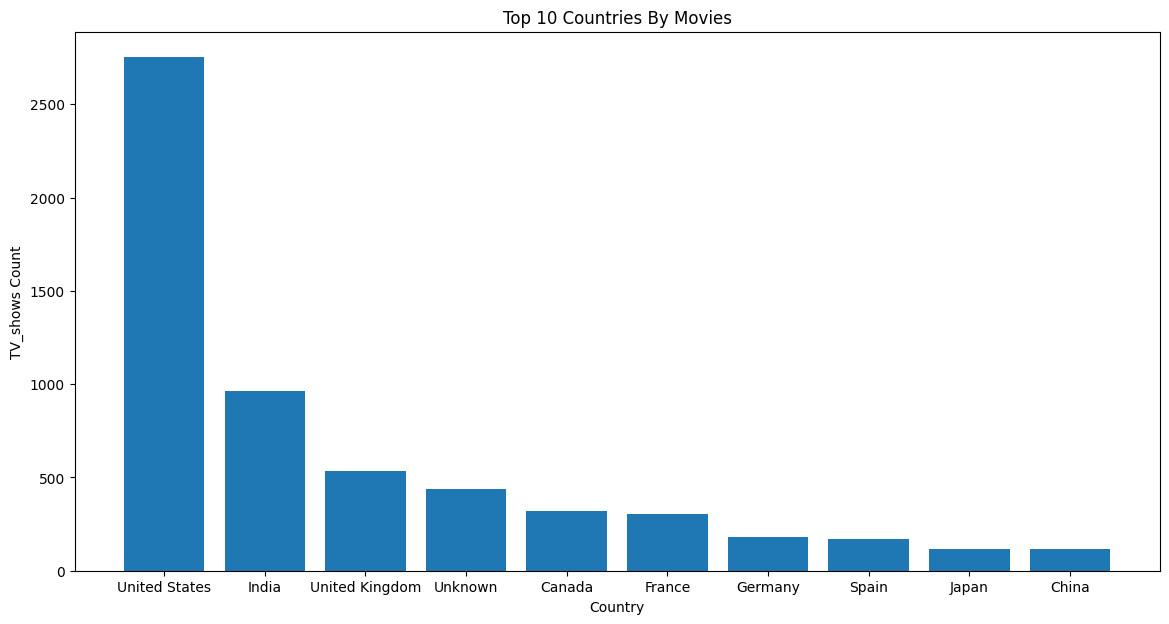

In [ ]:
Country_Based_Movies=Movies["country"].apply(lambda x: str(x).split(", "))
Country_Based_Movies=Country_Based_Movies.explode("country")
x=Country_Based_Movies.value_counts().index
y=Country_Based_Movies.value_counts().values
fig, ax = plt.subplots(figsize=(14,7))
ax.bar(x[:10],y[:10])
ax.set(title="Top 10 Countries By Movies",
        xlabel="Country",
        ylabel="TV_shows Count")

<Axes: xlabel='count', ylabel='listed_in'>

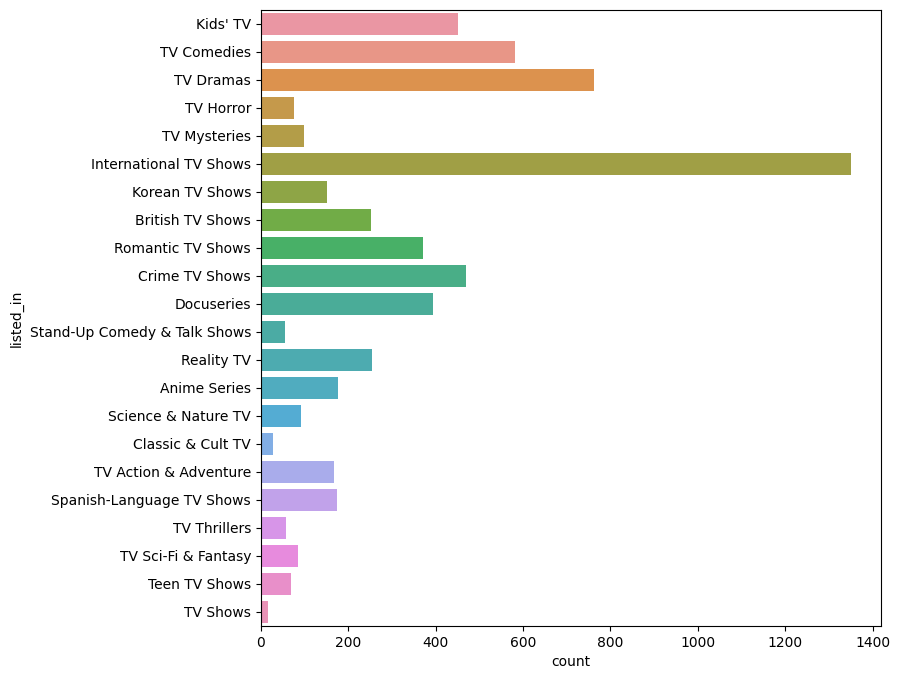

In [ ]:
NewTV_shows=TV_shows.explode("listed_in")
NewTV_shows.reset_index().drop("index",axis=1)
NewTV_shows["listed_in"]=NewTV_shows["listed_in"].apply(lambda x:str(x).strip())

fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(data=NewTV_shows,ax=ax,y="listed_in")

[Text(0.5, 1.0, 'Top 10 Countries By TV Shows'),
 Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'TV_shows Count')]

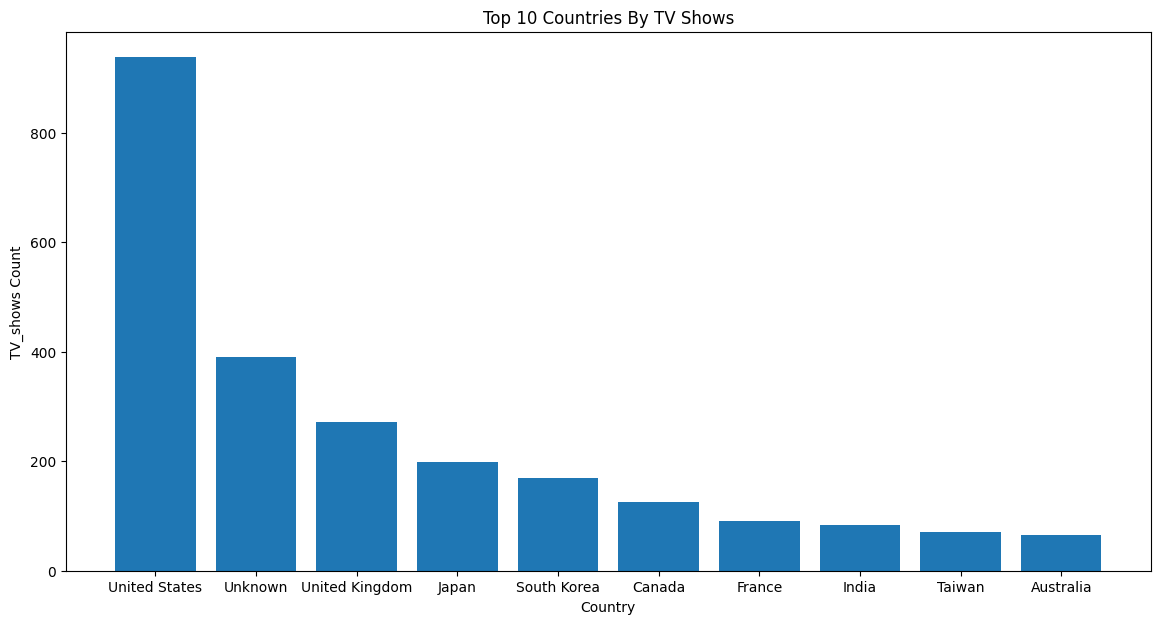

In [ ]:
Country_Based_TV=TV_shows["country"].apply(lambda x: str(x).split(", "))
Country_Based_TV=Country_Based_TV.explode("country")
x=Country_Based_TV.value_counts().index
y=Country_Based_TV.value_counts().values
fig, ax = plt.subplots(figsize=(14,7))
ax.bar(x[:10],y[:10])
ax.set(title="Top 10 Countries By TV Shows",
        xlabel="Country",
        ylabel="TV_shows Count")

In [ ]:
NewMovies=NewMovies.explode("cast")
#NewMovies


Actor=NewMovies["cast"].value_counts().index
No_of_Movies=NewMovies["cast"].value_counts().values
print("Most popular actor",Actor[1],No_of_Movies[1],"\n")
print("Movies Acted include following genres","\n")
NewMovies[NewMovies["cast"].str.contains("Anupam Kher")]["listed_in"].value_counts()

Most popular actor  Anupam Kher 106 

Movies Acted include following genres 



International Movies        38
Dramas                      28
Comedies                    20
Action & Adventure          12
Romantic Movies              7
Music & Musicals             5
Thrillers                    2
Independent Movies           2
Sci-Fi & Fantasy             1
Classic Movies               1
Children & Family Movies     1
Name: listed_in, dtype: int64

In [ ]:
#NewMovies
Director=Movies["director"].value_counts().index
No_of_Movies=Movies["director"].value_counts().values
print("Most popular director",Director[0],No_of_Movies[0],"\n")
print("Movies directed include following genres","\n")
# Movies[Movies["director"]==Director]["listed_in"].value_counts()

Most popular director Rajiv Chilaka 19 

Movies directed include following genres 



ValueError: ignored

In [ ]:
NewTV_shows=NewTV_shows.explode("cast")
# NewTV_shows
Actor=NewTV_shows["cast"].value_counts().index
No_of_Movies=NewTV_shows["cast"].value_counts().values
print("Most popular actor",Actor[1],No_of_Movies[1],"\n")
print("TV shows Acted include following genres","\n")
NewTV_shows[NewTV_shows["cast"].str.contains("Takahiro Sakurai")]["listed_in"].value_counts()

Most popular actor  Takahiro Sakurai 53 

TV shows Acted include following genres 



Anime Series              24
International TV Shows    22
Teen TV Shows              5
Kids' TV                   1
Crime TV Shows             1
TV Thrillers               1
TV Shows                   1
Name: listed_in, dtype: int64

In [ ]:
# NewTV_shows
director=NewTV_shows["director"].value_counts().index
No_of_Movies=NewTV_shows["director"].value_counts().values
print("Most popular director",director[0],No_of_Movies[0],"\n")
print("Shows directed include following genres","\n")
NewTV_shows[NewTV_shows["director"]=="Rob Seidenglanz"]["listed_in"].value_counts()

Most popular director Rob Seidenglanz 103 

Shows directed include following genres 



Crime TV Shows           23
TV Dramas                23
TV Mysteries             23
TV Action & Adventure    17
TV Sci-Fi & Fantasy      17
Name: listed_in, dtype: int64

In [ ]:
TV_shows_data=TV_shows["date_added"].dt.month.value_counts().sort_index().reset_index()
TV_shows_data.rename(columns = {'index':'Month',"date_added":"Count of Shows"}, inplace = True)
TV_shows_data

,Month,Count of Shows
0,1.0,192
1,2.0,181
2,3.0,213
3,4.0,214
4,5.0,193
5,6.0,236
6,7.0,262
7,8.0,236
8,9.0,251
9,10.0,215


[Text(0.5, 1.0, 'TV Shows by Month'),
 Text(0.5, 0, 'TV Shows'),
 Text(0, 0.5, 'Count')]

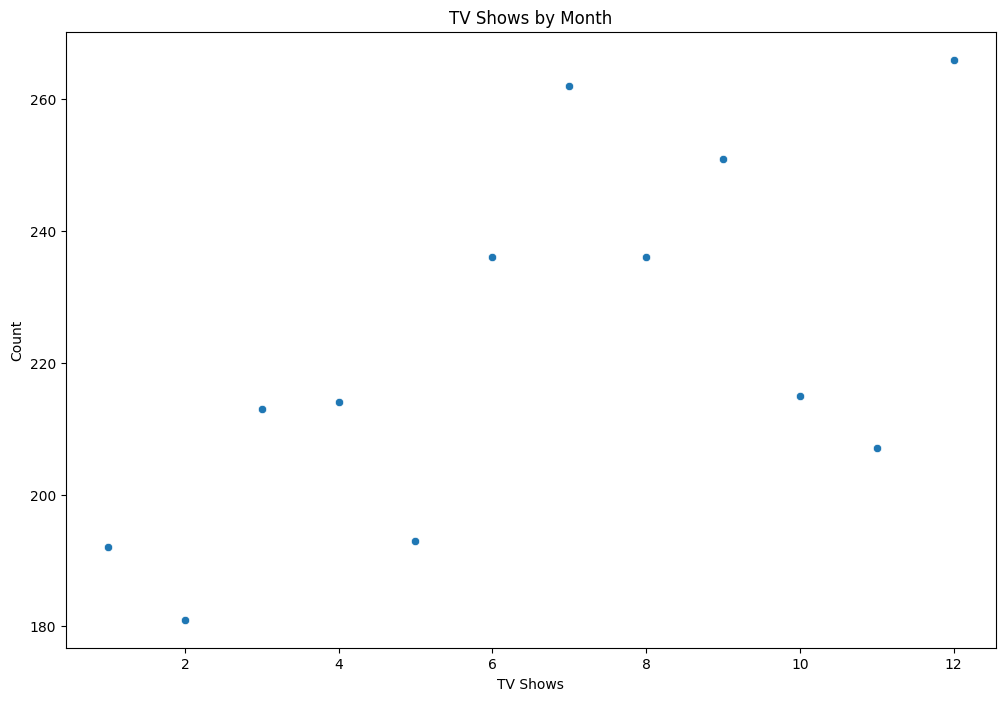

In [ ]:
x=TV_shows_data["Count of Shows"]
y=TV_shows_data["Month"]
fig,ax=plt.subplots(figsize=(12,8))
sns.scatterplot(data=TV_shows_data,ax=ax,x="Month",y="Count of Shows")
ax.set(title="TV Shows by Month",
        xlabel="TV Shows",
        ylabel="Count")

The June-Aug is a good time for TV shows

In [ ]:
Movies_data=Movies["date_added"].dt.month.value_counts().sort_index().reset_index()
Movies_data.rename(columns = {'index':'Month',"date_added":"Count of Shows"}, inplace = True)
Movies_data

,Month,Count of Shows
0,1,546
1,2,382
2,3,529
3,4,550
4,5,439
5,6,492
6,7,565
7,8,519
8,9,519
9,10,545


[Text(0.5, 1.0, 'Movies by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Count')]

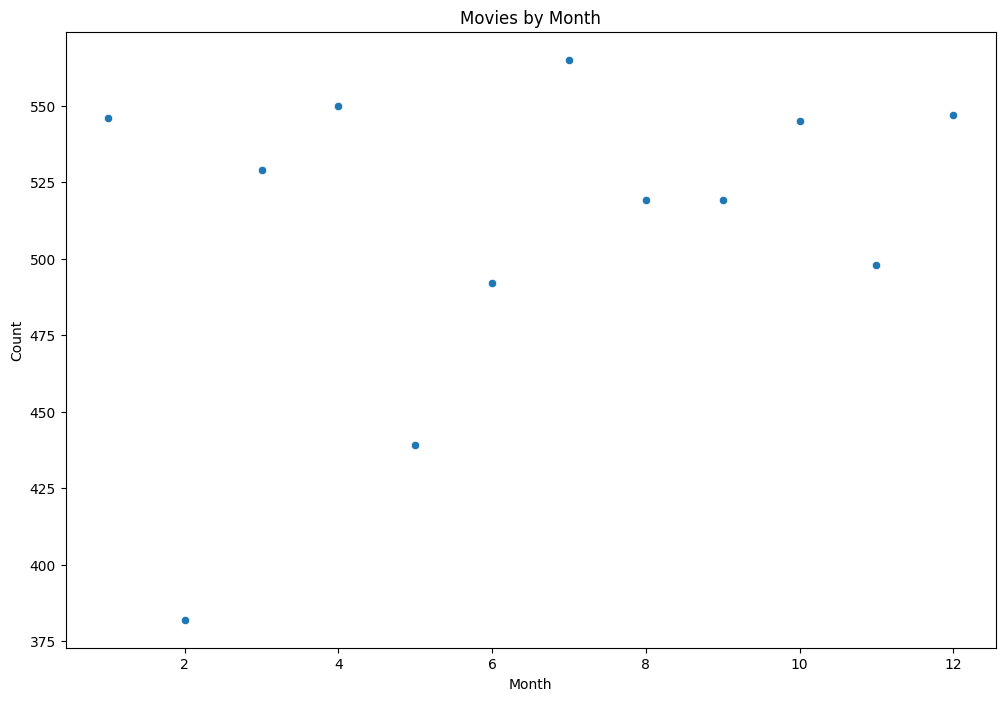

In [ ]:
x=Movies_data["Count of Shows"]
y=Movies_data["Month"]
fig,ax=plt.subplots(figsize=(12,8))
sns.scatterplot(data=Movies_data,ax=ax,x="Month",y="Count of Shows")
ax.set(title="Movies by Month",
        xlabel="Month",
        ylabel="Count")

# Insights Made





1) Based on the Data provided, The Platform has a lot more movies than TV Shows by almost 3 times. The Expense of making a TV show is although more than that of a movie, We as per data do not have any idea of this. But the most TV shows on the platform 1 season as a one off. These shows can have a second season if the budget allows it and The story is possible. But They should not extend more than 4-6 seasons as the show may have a chance of becoming monotonus

2) Most shows are based of the United States, Movies are also created primarily on US then followed by India. But a large group of it is based in US, therefore leaving Regional Audience of Countries Such as China and EU untapped.

3) There was a surge in the Movies and TV shows from 2019-2020 and then a drop in the same category. This might be because of the pandemic and Astronomical rise of people using the platform.

4)Lot of TV shows are added to the platform in fall months. This is also similar for Movies as well.

Movies

Most Popular Director
Cathy Garcia-Molina
International Movies    125

Most Popular Actor
Anupam Kher
International Movies        38




TV Shows

Most Popular Director Rob Seidenglanz 103
Crime TV Shows           23

Most Popular Actor Takahiro Sakurai
Anime Series              24